In [ ]:
from google.colab import files;
from IPython.display import Image;

In [ ]:
uploaded=files.upload();

In [ ]:
import cv2;
from PIL import Image;
img=cv2.imread('Screenshot (62).png');
img1=cv2.imread('Screenshot (62).png');
#img1=Image.open("Screenshot (62).png");
print(img);
print(len(img)); # rows
print(len(img[0])); # columns
print(len(img[0][0])); # 3=(g,b,r)
difference = cv2.subtract(img, img1)
b, g, r = cv2.split(difference)

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
  print("Equal")

[[[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 [[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 [[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 ...

 [[ 50  44  35]
  [ 50  44  35]
  [ 50  44  35]
  ...
  [ 53  44  47]
  [ 50  41  44]
  [ 51  42  45]]

 [[ 48  43  34]
  [ 48  43  34]
  [ 50  44  35]
  ...
  [ 51  42  45]
  [ 48  38  42]
  [ 52  43  46]]

 [[ 50  44  35]
  [ 50  44  35]
  [ 52  46  37]
  ...
  [ 50  41  44]
  [ 51  42  45]
  [ 49  39  43]]]
1080
1920
3
Equal


ALGORITHMS PROJECT CODE

Enter the number of images you want to insert : 7
Enter image 1 path with extension
car3.png


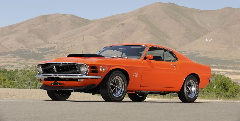

Enter image 2 path with extension
car1.png


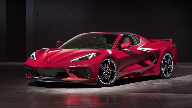

Enter image 3 path with extension
car2 (1).png


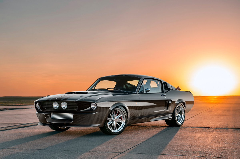

Enter image 4 path with extension
car4.png


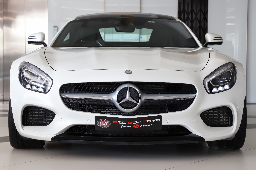

Enter image 5 path with extension
car5.png


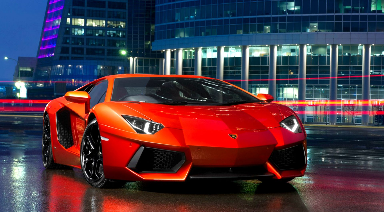

Enter image 6 path with extension
car6.png


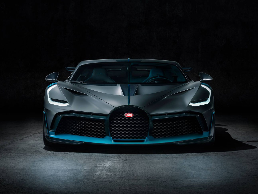

Enter image 7 path with extension
car7.png


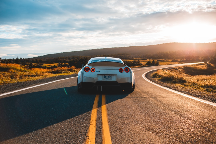

Images have been sorted and time taken for sorting is 0.000021 seconds.
car1.png. It's size= 565867 bytes
car3.png. It's size= 1027267 bytes
car2 (1).png. It's size= 1207168 bytes
car6.png. It's size= 1257436 bytes
car4.png. It's size= 1269502 bytes
car7.png. It's size= 1456526 bytes
car5.png. It's size= 3800406 bytes
All the images have been sorted based on thier size in increasing order.
Enter the path of the image you want to search :car5.png
The image is found. Time taken for searching is 0.029139 seconds


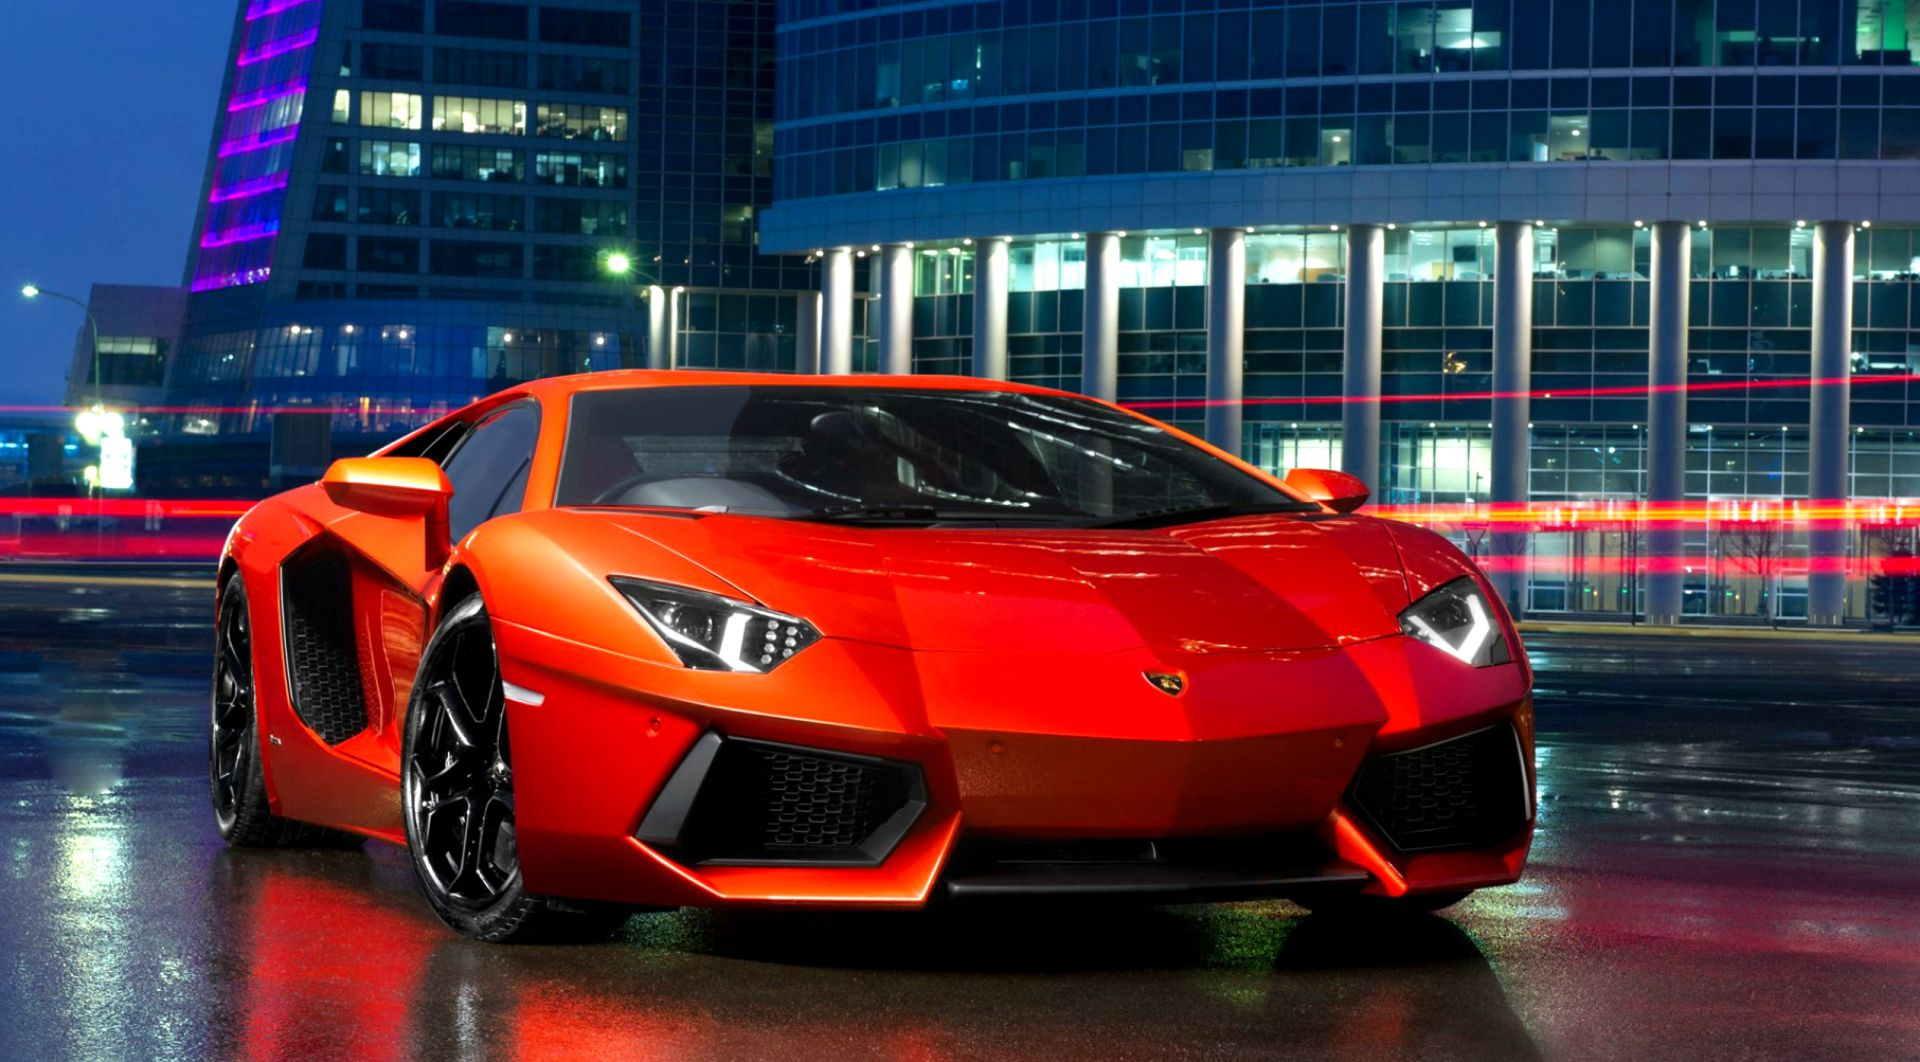

In [ ]:
import os;
import cv2;
from google.colab.patches import cv2_imshow;
import time;
 
def inp_1(n):
  f=[];
  for i in range(n):
    j=i+1;
    print("Enter image %d path with extension" %(j));
    p=input('');
    img=cv2.imread(p);    # reads image matrix(list) into img
    s=os.stat(p).st_size; # calculates img size in bytes
    f.append([img,s,p]);  # appends [img,size,path] into f
    w = int(img.shape[1] * 20/ 100);
    h = int(img.shape[0] * 20/ 100);
    cv2_imshow(cv2.resize(img,(w,h)));  # preview of the entered img(smaller size)
  return(f);
 
def partition(arr, low, high):
   i = (low-1);
   pivot = arr[high][1];
   for j in range(low, high):
       if arr[j][1] <= pivot: 
           i = i+1;
           arr[i], arr[j] = arr[j], arr[i];
   arr[i+1], arr[high] = arr[high], arr[i+1];
   return (i+1);
 
def quickSort(arr, low, high):
   if len(arr) == 1:
       return arr;
   if low < high:
       pi = partition(arr, low, high);
       quickSort(arr, low, pi-1);
       quickSort(arr, pi+1, high);
# Time complexity of quick sort is log2(n)... (where n is len(arr)).
 
def linearsearch(arr, x):
  for i in range(len(arr)):
    if (len(arr[i][0]))==(len(x)):    # check if both have same hieght
      if (len(arr[i][0][0]))==(len(x[0])):  # check if both have same width
        difference = cv2.subtract(arr[i][0], x); #O(1)*O(n)
        b, g, r = cv2.split(difference); # O(1)*O(n)
        if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
          return (i); # O(1)*O(n)
  return (-1);
#Time complexity of the search is O(n)
 
def main():
  t="Enter the number of images you want to insert : ";
  n=int(input(t));
  I=inp_1(n);
  st1=time.time();
  quickSort(I,0,n-1);
  et1=time.time();
  print("Images have been sorted and time taken for sorting is %f seconds." %(et1-st1));
  for i in range(n):
    print(I[i][2]+". It's size= %d bytes" %(I[i][1]));
  print("All the images have been sorted based on thier size in increasing order.");
  t1="Enter the path of the image you want to search :";
  k=input(t1);
  x=cv2.imread(k);
  st2=time.time();
  N=linearsearch(I,x);
  et2=time.time();
  if N==-1:
    print("Could not find the image");
  else:
    print("The image is found. Time taken for searching is %f seconds" %(et2-st2));
    cv2_imshow(I[N][0]);
 
if __name__ == "__main__":
    main();